## Observations and Insights 

observation 1:  Based off of all the information the Drug Regimen Capomulin had the most success in reduced tumor size.

observation 2: From the info there were really no outliers in my data.  Most were in range of each other.  Nothing out of the ordinary.

observation 3:  Over the span of time every mouse i placed in the line chart showing tumor size overtime had shown a decrease of tumor size.  The final tumor size is not what it started out as.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from matplotlib import rcParams
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "resources/Mouse_metadata.csv"
study_results_path = "resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
len(study_data)

1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_data.groupby("Mouse ID")["Timepoint"].unique()

Mouse ID
a203    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
a251    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
a262    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
a275    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
a366                [0, 5, 10, 15, 20, 25, 30]
                         ...                  
z435                                [0, 5, 10]
z578    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
z581    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
z795    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
z969    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
Name: Timepoint, Length: 249, dtype: object

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
# Will come back to this

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_study_data = study_data.drop_duplicates(subset=["Mouse ID"])
clean_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.

len(clean_study_data)

249

## Summary Statistics

In [9]:
study_data["Drug Regimen"].unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'],
      dtype=object)

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

avg_tumor_volume = study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

median_tumor_volume = study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

var_tumor_volume = study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

std_tumor_volume = study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

sem_tumor_volume = study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary dataframe.

tumor_volume_df = pd.DataFrame({"Average Tumor Volume":avg_tumor_volume,
                                    "Median of Tumor Volume":median_tumor_volume,
                                        "Variance of Tumor Volume":var_tumor_volume,
                                            "Standard Deviation":std_tumor_volume,
                                                "SEM":sem_tumor_volume})
tumor_volume_df.head()


,Average Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

drug_regimen = study_data.groupby(["Drug Regimen"])

drug_regimen["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"]).head()


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Timepoint, dtype: int64

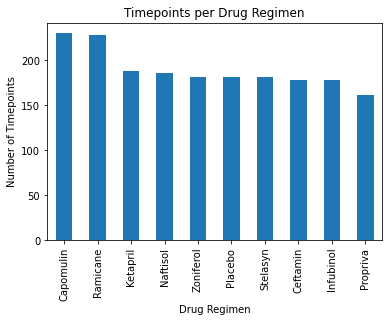

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_count = drug_regimen["Timepoint"].count()
sort_count = mice_count.sort_values(ascending= False)

pandas_timepoints_chart = sort_count.plot(kind="bar", title="Timepoints per Drug Regimen")
pandas_timepoints_chart.set_xlabel("Drug Regimen")
pandas_timepoints_chart.set_ylabel("Number of Timepoints")

sort_count

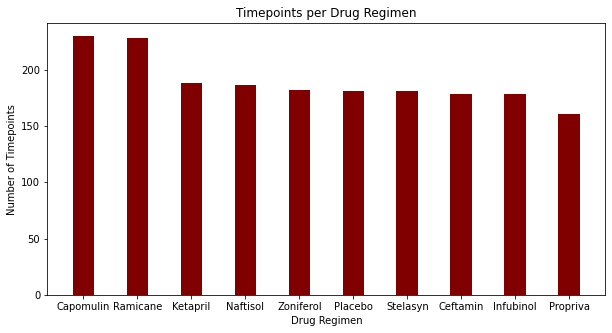

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Timepoint, dtype: int64

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#sort_count = mice_count.sort_values(ascending= False)

regimen_list = ["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol",
                "Placebo","Stelasyn","Ceftamin","Infubinol","Propriva"]

fig = plt.figure(figsize = (10, 5))

plt.bar(regimen_list, sort_count, color ='maroon',
        width = 0.4)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Timepoints per Drug Regimen")
plt.show()
sort_count

Male      958
Female    935
Name: Sex, dtype: int64

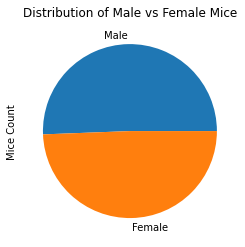

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = study_data["Sex"].value_counts()

pandas_sex_count_chart = sex_count.plot(kind="pie", title="Distribution of Male vs Female Mice")
pandas_sex_count_chart.set_ylabel("Mice Count")

sex_count

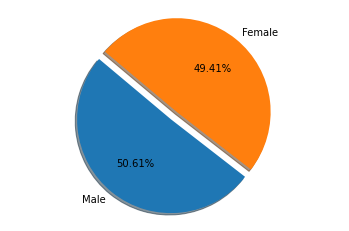

Male      958
Female    935
Name: Sex, dtype: int64

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#sex_count = study_data["Sex"].value_counts()

sex = ["Male","Female"]
explode = (0.1, 0)

plt.pie(sex_count, explode=explode, labels=sex, 
        autopct="%.1f1%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()
sex_count

## Quartiles, Outliers and Boxplots

In [16]:
#final_capomulin = study_data.loc[study_data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Tumor Volume (mm3)"].last()
#final_ramicane = study_data.loc[study_data["Drug Regimen"] == "Ramicane"].groupby("Mouse ID")["Tumor Volume (mm3)"].last()
#final_infubinol = study_data.loc[study_data["Drug Regimen"] == "Infubinol"].groupby("Mouse ID")["Tumor Volume (mm3)"].last()
#final_ceftamin = study_data.loc[study_data["Drug Regimen"] == "Ceftamin"].groupby("Mouse ID")["Tumor Volume (mm3)"].last()
#four_regimen_final = pd.DataFrame({"Final Tumor Size Capomulin":final_capomulin,
#                                    "Final Tumor Size Ramicane": final_ramicane,
#                                        "Final Tumor Size Ifubinol":final_infubinol,
#                                            "Final Tumor Size Ceftamin":final_ceftamin})
#merged_df = pd.merge(study_data,
#                        four_regimen_final,
#                            on="Mouse ID",
#                                how="left")

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

final_tumor_each = study_data.groupby("Mouse ID")["Tumor Volume (mm3)"].last()
last_timepoint = study_data.groupby("Mouse ID")["Timepoint"].last()
extra_df = pd.DataFrame({"Final Tumor Size":final_tumor_each,
                            "Last Timepoint":last_timepoint})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(study_data,
                        extra_df,
                            on="Mouse ID",
                                how="left")

merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final Tumor Size,Last Timepoint
0,b128,0,45.0,0,Capomulin,Female,9,22,38.982878,45
1,f932,0,45.0,0,Ketapril,Male,15,29,45.000000,0
2,g107,0,45.0,0,Ketapril,Female,2,29,71.905117,35
3,a457,0,45.0,0,Ketapril,Female,11,30,49.783419,10
4,c819,0,45.0,0,Ketapril,Male,21,25,62.175705,40


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
final_tumor_vol = []

for i, row in merged_df.iterrows():
    if row["Drug Regimen"] == regimen_list[0]:
        tumor_vol.append(row["Final Tumor Size"])
    elif row["Drug Regimen"] == regimen_list[1]:
        tumor_vol.append(row["Final Tumor Size"])
    elif row["Drug Regimen"] == regimen_list[2]:
        tumor_vol.append(row["Final Tumor Size"])
    elif row["Drug Regimen"] == regimen_list[3]:
        tumor_vol.append(row["Final Tumor Size"])
    else:
        pass
 
for x in tumor_vol:
    if x not in final_tumor_vol:
        final_tumor_vol.append(x)
        
        
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes 
    # Determine outliers using upper and lower bounds

lowerq = np.quantile(final_tumor_vol,.25)
medianq = np.quantile(final_tumor_vol,.5)
upperq = np.quantile(final_tumor_vol,.75)
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of final tumor volume is: {lowerq}")
print(f"The upper quartile of final tumor volume is: {upperq}")
print(f"The interquartile range of final tumor volume is: {iqr}")
print(f"The the median of final tumor volume is: {medianq}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")    

The lower quartile of final tumor volume is: 37.07402422
The upper quartile of final tumor volume is: 60.16518046
The interquartile range of final tumor volume is: 23.091156240000004
The the median of final tumor volume is: 45.0
Values below 2.437289859999993 could be outliers.
Values above 94.80191482000001 could be outliers.


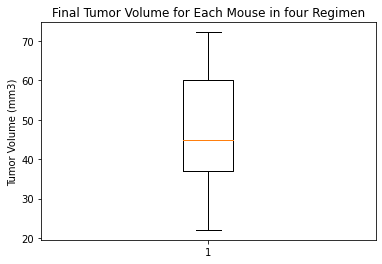

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume for Each Mouse in four Regimen")
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(final_tumor_vol)
plt.show()

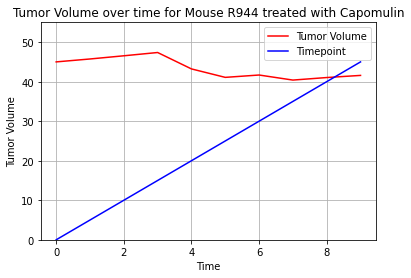

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Time on X axis & Tumor volume on Y axis
r944_df = study_data.loc[study_data["Mouse ID"] == "r944"]

time = np.arange(len(r944_volume))
r944_volume = r944_df["Tumor Volume (mm3)"]
r944_timepoints = r944_df["Timepoint"]

tumor_volume, = plt.plot(time, r944_volume, color="red", label="Tumor Volume")
timepoints, = plt.plot(time, r944_timepoints, color="blue", label="Timepoint")

plt.title("Tumor Volume over time for Mouse R944 treated with Capomulin")
plt.xlabel("Time")
plt.ylabel("Tumor Volume")


plt.ylim(0,55)

plt.legend(handles=[tumor_volume, timepoints], loc="best")
plt.grid()
plt.show()

## Line and Scatter Plots

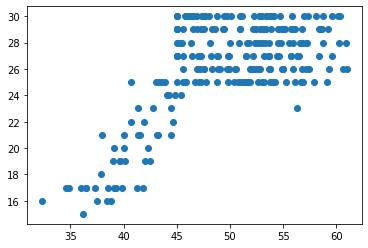

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

scatter_avg_tumor = study_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = study_data.groupby("Mouse ID")["Weight (g)"].first()

plt.scatter(scatter_avg_tumor, mouse_weight)

## Correlation and Regression

The r-squared is: 0.4346083133458691


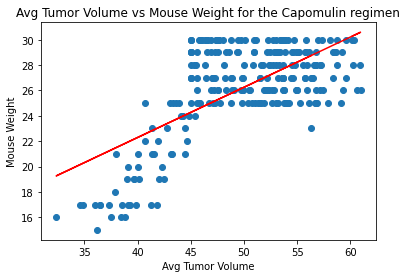

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# This does not look right to me so im still researching how i can possibly fix it

plt.scatter(scatter_avg_tumor, mouse_weight)

(slope, intercept, rvalue, pvalue, stderr) = linregress(scatter_avg_tumor, mouse_weight)
regress_values = scatter_avg_tumor * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(scatter_avg_tumor,regress_values,"r-")
plt.annotate(line_eq,(0,60),fontsize=15,color="red")
plt.title("Avg Tumor Volume vs Mouse Weight for the Capomulin regimen")
plt.xlabel("Avg Tumor Volume")
plt.ylabel("Mouse Weight")
print(f"The r-squared is: {rvalue**2}")
plt.show()